In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from sklearn.utils import shuffle
import os
import cv2
import numpy as np

### Load Dataset

In [2]:

def load_dataset():
    X_train = []
    y_train = []
    bottles_folder = "C:\\Users\\PC\\Desktop\\Python\\dataset\\bottles"
    for filename in os.listdir(bottles_folder):
        path = bottles_folder + "\\" + filename
        image = cv2.imread(path)
        image = cv2.resize(image,(240, 240))
        X_train.append(image)
        y_train.append(0)

    plastic_folder = "C:\\Users\\PC\\Desktop\\Python\\dataset\\plastic_bag"
    for filename in os.listdir(plastic_folder):
        path = plastic_folder + "\\" + filename
        image = cv2.imread(path)
        image = cv2.resize(image,(240, 240))
        X_train.append(image)
        y_train.append(1)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train,y_train


### Class

In [70]:
classification = ['bottle','plastic_bag']

In [3]:
X_train,y_train = load_dataset()
# Xao tron khong theo thu tu
X_train,y_train = shuffle(X_train,y_train)

X_train  = X_train/255

### Model

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(240,240,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),input_shape=(240,240,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(240,240,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


###### Training model

In [20]:
model.fit(X_train,y_train,epochs=8)

Epoch 1/8
37/37 [==============================] - 57s 2s/step - loss: 0.2843 - accuracy: 0.8682
Epoch 2/8
37/37 [==============================] - 64s 2s/step - loss: 0.2189 - accuracy: 0.9027
Epoch 3/8
37/37 [==============================] - 61s 2s/step - loss: 0.2057 - accuracy: 0.9130
Epoch 4/8
37/37 [==============================] - 57s 2s/step - loss: 0.1790 - accuracy: 0.9259
Epoch 5/8
37/37 [==============================] - 74s 2s/step - loss: 0.1491 - accuracy: 0.9380
Epoch 6/8
37/37 [==============================] - 65s 2s/step - loss: 0.1311 - accuracy: 0.9509
Epoch 7/8
37/37 [==============================] - 64s 2s/step - loss: 0.1244 - accuracy: 0.9561
Epoch 8/8
37/37 [==============================] - 66s 2s/step - loss: 0.1000 - accuracy: 0.9664


Text(0.5, 1.0, 'bottle')

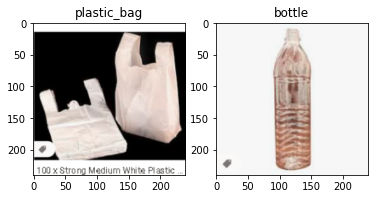

In [87]:
# input la 1 mang cac matran
predict = model.predict(np.array([X_train[2],X_train[10]]))

# lay index cua phan tu co gia tri du doan cao nhat 
index1 = np.argmax(predict[0])
# lay index cua phan tu co gia tri du doan cao nhat
index2 = np.argmax(predict[1])

plt.subplot(1,2,1)
plt.imshow(X_train[2])
plt.title(classification[index1])

plt.subplot(1,2,2)
plt.imshow(X_train[10])
plt.title(classification[index2])


### Load ảnh từ camera và dự đoán

In [88]:
cam = cv2.VideoCapture(0)
# Lay anh tu camera de du doan cho den khi nhan space
while True:
    ret, img = cam.read()    
    if not ret:
        break
    # turn on camera
    cv2.imshow("Camera", img)
    # resize image to 240,240
    img=cv2.resize(img,(240,240))
    # predict
    predict  = model.predict(np.array([img]))
    index = np.argmax(predict[0])
    # print one line
    print(classification[index],end="\r")
    key = cv2.waitKey(1)
    # space key
    if key == 32:
        break
cam.release()
cv2.destroyAllWindows()
